In [ ]:
def gini(array):
    """
    Compute the Gini coefficient for a given array of values.

    The Gini coefficient is a measure of income or wealth inequality that ranges from 0 to 1,
    with 0 indicating perfect equality (i.e., everyone has the same income) and 1 indicating
    perfect inequality (i.e., one person has all the income and everyone else has none).

    Parameters:
    -----------
    array : array-like
        Input array of values.

    Returns:
    --------
    float
        Gini coefficient for the input array of values.
    """
    
    # from: https://github.com/oliviaguest/gini
    #http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm 
    array = np.array(array)
    array = array.flatten() #all values are treated equally, arrays must be 1d
    if np.amin(array) < 0:
        array += np.amin(array) #non-negative
    array += 0.0000001 #non-0
    array = np.sort(array) #values must be sorted
    index = np.arange(1,array.shape[0]+1) 
    n = array.shape[0]
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array)))



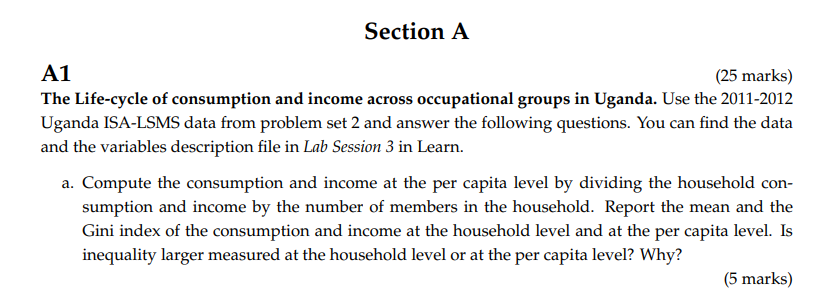

In [ ]:
import numpy as np 
import pandas as pd

#setup 
#import dsata
df1 = pd.read_excel("UNPS_1112_PS2.xls")

summarize(df1)

#compute consumption per capita 
consumption_per_capita =  df1['consumption'] / df1['familysize']

#compute income per capita 
income_per_capita = df1['income'] / df1['familysize']

#calculate the mean and the gini index of the consumption at the househod level
mean_consumption_per_capita = np.mean(df1['consumption'] / df1['familysize'])
gini_consumption_per_capita = gini(consumption_per_capita)

#calculate the mean and the gini index of the income at the househod level
mean_income_per_capita = np.mean(df1['income'] / df1['familysize'])
gini_income_per_capita = gini(income_per_capita)

# compare the Gini coefficients calculated for household consumption and income with those calculated for consumption and income per capita.
gini_income = gini(df1['income'])
gini_consumption = gini(df1['consumption'])

# Print the results
print("Mean consumption per capita:", mean_consumption_per_capita)
print("Mean income per capita:", mean_income_per_capita)
print("Gini coefficient for consumption per capita:", gini_consumption_per_capita)
print("Gini coefficient for income per capita:", gini_income_per_capita)
print("Gini coefficient for consumption ",gini_consumption)
print("Gini coefficient for income ",gini_income)


# Compare the Gini coefficients for household and per capita measures
if gini_consumption > gini_consumption_per_capita:
    print("Inequality is larger at the household level for consumption.")
else:
    print("Inequality is larger at the per capita level for consumption.")
    
if gini_income > gini_income_per_capita:
    print("Inequality is larger at the household level for income.")
else:
    print("Inequality is larger at the per capita level for income.")


## rephraase this and ask chatgpt 4

If the Gini coefficient for household consumption or income is higher than the Gini coefficient for consumption or income per capita, then inequality is larger at the household level. Conversely, if the Gini coefficient for consumption or income per capita is higher than the Gini coefficient for household consumption or income, then inequality is larger at the per capita level.

It's difficult to predict what the result of this comparison would be without knowing the specific data you are working with. In general, if there are large differences in household size or income within the same household, then inequality may be larger at the per capita level. Conversely, if household income and consumption are relatively evenly distributed within households, then inequality may be larger at the household level.

Therefore, it is important to examine both measures of inequality to gain a complete understanding of the distribution of consumption and income within the population.

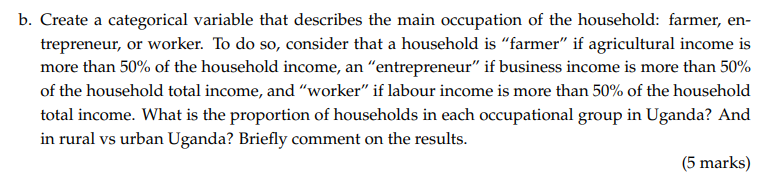

In [ ]:
# i can just create a binary array that checks for this 

#create a binary array called farmer zvasads